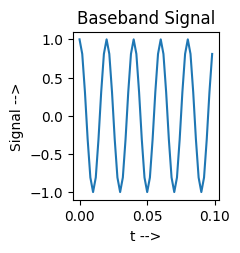

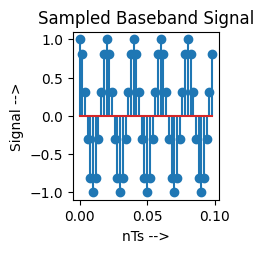

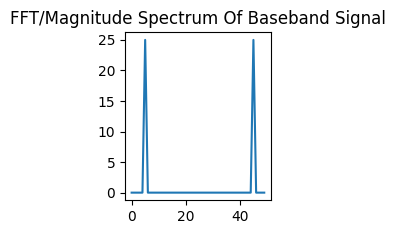

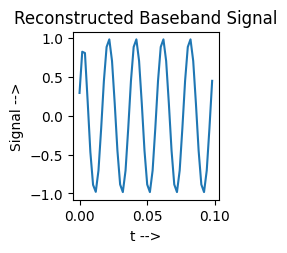

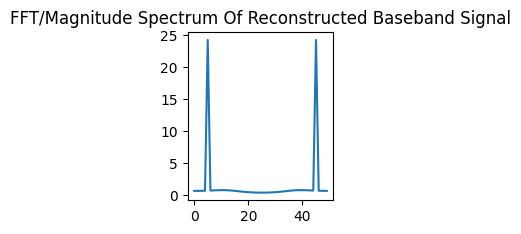

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

# Bandlimited/Bandpass Signal
f = 50  # baseband signal frequency in Hz.
M = 10  # minimum, M=2, for Nyquist Criteria: fs >= 2fmax.
fs = M * f  # sampling frequency in Hz.
T = 1 / f  # time period of baseband signal in s.

# Time of baseband signal
t = np.arange(0, 5 * T, 0.1 * T)

# Sampling time of baseband signal
ts = np.arange(0, 5 * T, 1 / fs)

# Baseband signal construction
x = np.cos(2 * np.pi * f * t)

# Plotting baseband signal
plt.subplot(2, 3, 1)
plt.plot(t, x)
plt.title("Baseband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# Sampled baseband signal construction
xs = np.cos(2 * np.pi * f * ts)

# Plotting sampled baseband signal
plt.subplot(2, 3, 2)
plt.stem(ts, xs)
plt.title("Sampled Baseband Signal")
plt.xlabel("nTs -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of baseband signal
x_f = fft(x)

# Plotting FFT/Magnitude Spectrum of baseband signal
plt.subplot(2, 3, 3)
plt.plot(abs(x_f))
plt.title("FFT/Magnitude Spectrum Of Baseband Signal")
plt.show()

# Pass-band and stop-band frequencies
wp = (fs / 2) / fs
ws = (fs - 10) / fs

# Pass-band and stop-band attenuations
apb = 3  # pass-band attenuation in dB
asb = 60  # stop-band attenuation in dB

# Determining order and cut-off frequency of low-pass filter
[N, Wn] = signal.buttord(wp, ws, apb, asb)

# Finding constants for low-pass filter
b, a = signal.butter(N, Wn, 'low')

# Baseband signal reconstruction
xr = signal.lfilter(b, a, xs)

# Plotting reconstructed baseband signal
plt.subplot(2, 3, 4)
plt.plot(t, xr)
plt.title("Reconstructed Baseband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of reconstructed baseband signal
xr_f = fft(xr)

# Plotting FFT/Magnitude Spectrum of reconstructed baseband signal
plt.subplot(2, 3, 5)
plt.plot(abs(xr_f))
plt.title("FFT/Magnitude Spectrum Of Reconstructed Baseband Signal")
plt.show()


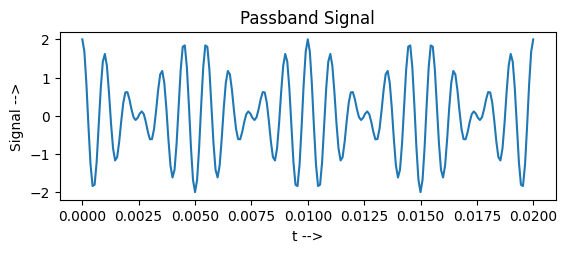

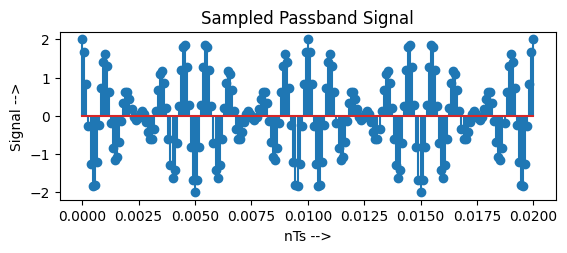

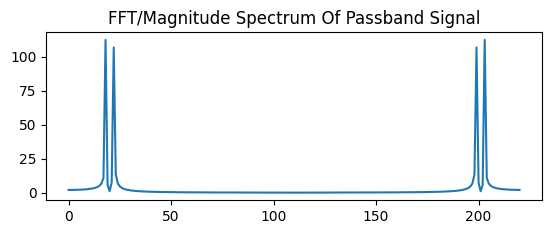

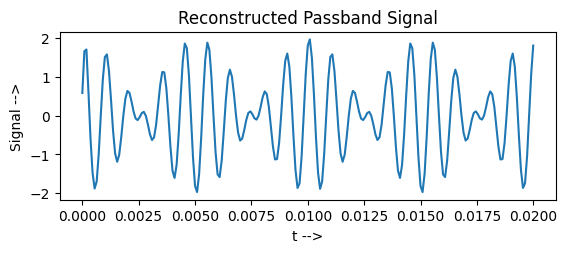

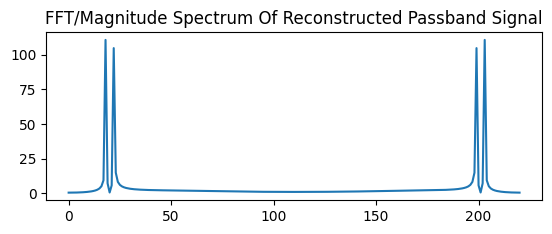

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

# Passband Signal
f = 100  # passband signal frequency in Hz.
M = 10  # minimum, M=2, for Nyquist Criteria: fs >= 2fmax.
A = 1  # Amplitude of passband signal.
fc = 1000  # carrier signal frequency in Hz.
Ac = 2  # carrier signal amplitude.
fs = M * (f + fc)  # sampling frequency in Hz.
T = 1 / f  # time period of passband signal in s.
Ts = 1 / fs  # Sampling Time period in s.

# Time and sampling time of passband signal
t = np.arange(0, 2 * T, 1 * Ts)
ts = np.arange(0, 2 * T, 1 * Ts)

# Passband signal and carrier signal construction
x = A * np.cos(2 * np.pi * f * t)
xc = Ac * np.cos(2 * np.pi * fc * t)

# Resultant passband signal (DSBSC)
X = np.multiply(x, xc)

# Plotting passband signal
plt.subplot(212)
plt.plot(t, X)
plt.title("Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# Sampled passband signal construction
xs = A * np.cos(2 * np.pi * f * ts)
xc_s = Ac * np.cos(2 * np.pi * fc * ts)

# Resultant sampled passband signal
Xs = np.multiply(xs, xc)

# Plotting sampled passband signal
plt.subplot(212)
plt.stem(ts, Xs)
plt.title("Sampled Passband Signal")
plt.xlabel("nTs -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of passband signal
X_f = fft(X)

# Plotting FFT/Magnitude Spectrum of passband signal
plt.subplot(212)
plt.plot(abs(X_f))
plt.title("FFT/Magnitude Spectrum Of Passband Signal")
plt.show()

# Pass-band and stop-band frequencies
wp = (fs / 2) / fs
ws = (fs - 10) / fs

# Pass-band and stop-band attenuations
apb = 3  # pass-band attenuation in dB
asb = 60  # stop-band attenuation in dB

# Determining order and cut-off frequency of low-pass filter
[N, Wn] = signal.buttord(wp, ws, apb, asb)

# Finding constants for low-pass filter
b, a = signal.butter(N, Wn, 'low')

# Passband signal reconstruction
Xr = signal.lfilter(b, a, Xs)

# Plotting reconstructed passband signal
plt.subplot(212)
plt.plot(t, Xr)
plt.title("Reconstructed Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of reconstructed passband signal
Xr_f = fft(Xr)

# Plotting FFT/Magnitude Spectrum of reconstructed passband signal
plt.subplot(212)
plt.plot(abs(Xr_f))
plt.title("FFT/Magnitude Spectrum Of Reconstructed Passband Signal")
plt.show()


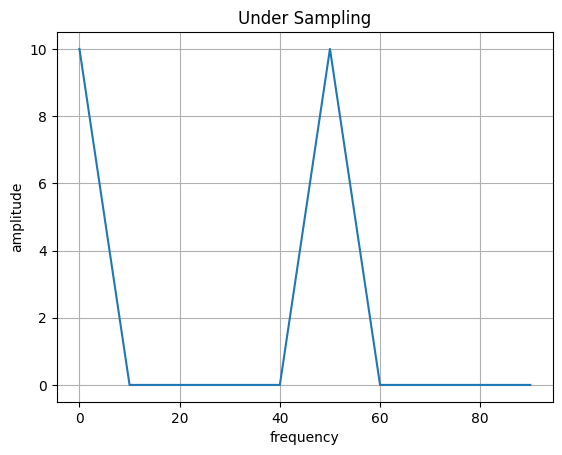

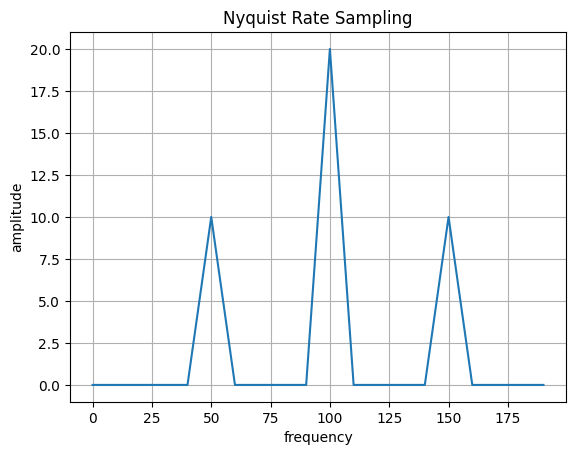

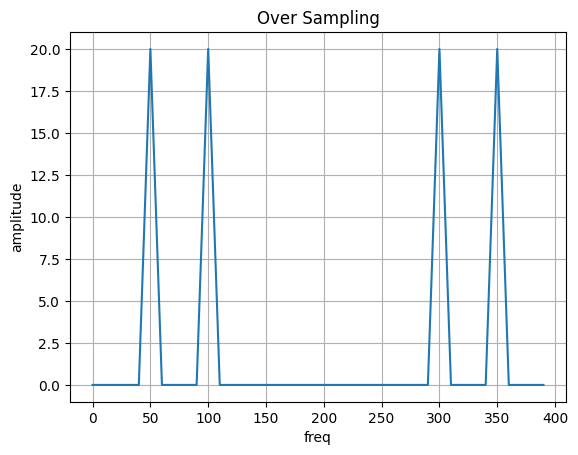

In [39]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 100
f2 = 50

# case 1  under sampling 

fn = 2 * max(f1, f2)
fs = fn / 2
t = np.arange(0, 0.1, 1/fs)
x = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)
xk = np.fft.fft(x)
f = np.arange(0, len(xk)) * fs / len(xk)


plt.figure(1)
plt.plot(f, np.abs(xk))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Under Sampling')
plt.grid()

# case 2  Nyquist Rate sampling
fs = fn
t = np.arange(0, 0.1, 1/fs)
x = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)
xk = np.fft.fft(x)
f = np.arange(0, len(xk)) * fs / len(xk)




plt.figure(2)
plt.plot(f, np.abs(xk))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Nyquist Rate Sampling')
plt.grid()


# case 3  Over sampling
fs = 2 * fn
t = np.arange(0, 0.1, 1/fs)
x = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)
xk = np.fft.fft(x)
f = np.arange(0, len(xk)) * fs / len(xk)

plt.figure(3)
plt.plot(f, np.abs(xk))
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.title('Over Sampling')
# plt.xlim([-fs/2, fs/2]) 
plt.grid()


plt.show()


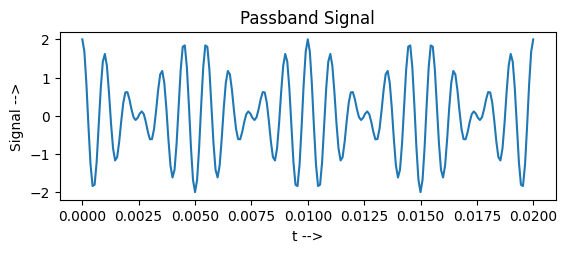

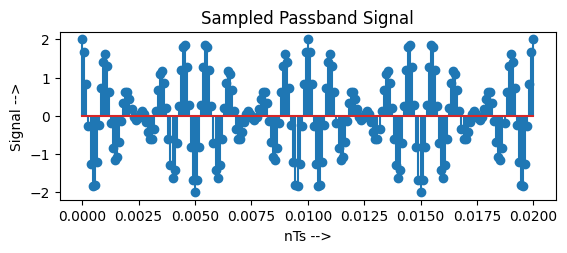

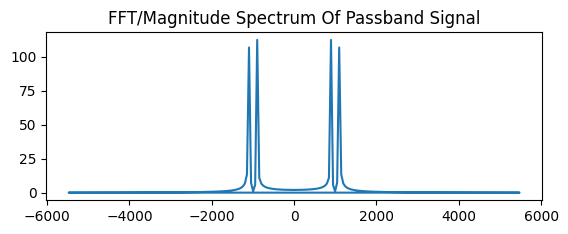

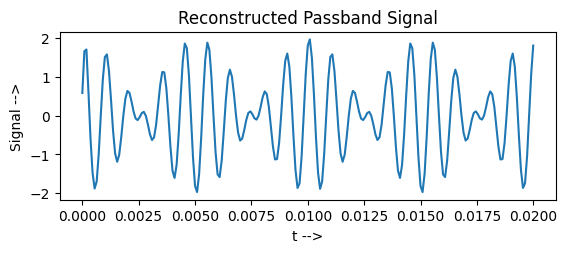

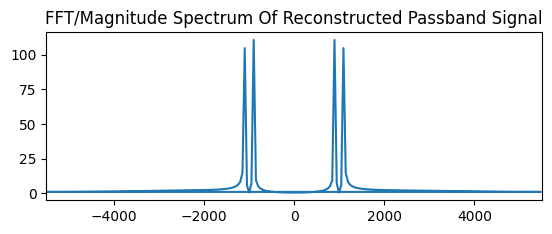

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal

# Passband Signal
f = 100  # passband signal frequency in Hz.
M = 10  # minimum, M=2, for Nyquist Criteria: fs >= 2fmax.
A = 1  # Amplitude of passband signal.
fc = 1000  # carrier signal frequency in Hz.
Ac = 2  # carrier signal amplitude.
fs = M * (f + fc)  # sampling frequency in Hz.
T = 1 / f  # time period of passband signal in s.
Ts = 1 / fs  # Sampling Time period in s.

# Time and sampling time of passband signal
t = np.arange(0, 2 * T, 1 * Ts)
ts = np.arange(0, 2 * T, 1 * Ts)

# Passband signal and carrier signal construction
x = A * np.cos(2 * np.pi * f * t)
xc = Ac * np.cos(2 * np.pi * fc * t)

# Resultant passband signal (DSBSC)
X = np.multiply(x, xc)

# Plotting passband signal
plt.subplot(212)
plt.plot(t, X)
plt.title("Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# Sampled passband signal construction
xs = A * np.cos(2 * np.pi * f * ts)
xc_s = Ac * np.cos(2 * np.pi * fc * ts)

# Resultant sampled passband signal
Xs = np.multiply(xs, xc)

# Plotting sampled passband signal
plt.subplot(212)
plt.stem(ts, Xs)
plt.title("Sampled Passband Signal")
plt.xlabel("nTs -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of passband signal
X_f = fft(X)
freqs = fftfreq(len(X_f), d=Ts)  # Frequency values for FFT result

# Plotting FFT/Magnitude Spectrum of passband signal
plt.subplot(212)
plt.plot(freqs, abs(X_f))
plt.title("FFT/Magnitude Spectrum Of Passband Signal")
plt.show()

# Pass-band and stop-band frequencies
wp = (fs / 2) / fs
ws = (fs - 10) / fs

# Pass-band and stop-band attenuations
apb = 3  # pass-band attenuation in dB
asb = 60  # stop-band attenuation in dB

# Determining order and cut-off frequency of low-pass filter
[N, Wn] = signal.buttord(wp, ws, apb, asb)

# Finding constants for low-pass filter
b, a = signal.butter(N, Wn, 'low')

# Passband signal reconstruction
Xr = signal.lfilter(b, a, Xs)

# Plotting reconstructed passband signal
plt.subplot(212)
plt.plot(t, Xr)
plt.title("Reconstructed Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()

# FFT of reconstructed passband signal
Xr_f = fft(Xr)
freqs_r = fftfreq(len(Xr_f), d=Ts)  # Frequency values for FFT result

# Plotting FFT/Magnitude Spectrum of reconstructed passband signal
plt.subplot(212)
plt.plot(freqs_r, abs(Xr_f))
plt.xlim([-fs/2, fs/2])  # Adjusting the x-axis limits for better visibility
plt.title("FFT/Magnitude Spectrum Of Reconstructed Passband Signal")
plt.show()
